# **Porter**: Neural Networks Regression



Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

- **market_id** : integer id for the market where the restaurant lies
- **created_at** : the timestamp at which the order was placed
- **actual_delivery_time** : the timestamp when the order was delivered
- **store_primary_category** : category for the restaurant
- **order_protocol** : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- **total_items subtotal** : final price of the order
- **num_distinct_items** : the number of distinct items in the order
- **min_item_price** : price of the cheapest item in the order
- **max_item_price** : price of the costliest item in order
- **total_onshift_partners** : number of delivery partners on duty at the time order was placed
- **total_busy_partners** : number of delivery partners attending to other tasks
- **total_outstanding_orders** : total number of orders to be fulfilled at the moment

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./Porterdataset.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
# Convert timestamps to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Create target column: delivery time in minutes
df['delivery_time_mins'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Extract hour of the day and day of the week
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6

In [4]:
# Check null values
null_summary = df.isnull().sum().sort_values(ascending=False)
null_summary

,0
total_onshift_partners,16262
total_busy_partners,16262
total_outstanding_orders,16262
store_primary_category,4760
order_protocol,995
market_id,987
delivery_time_mins,7
actual_delivery_time,7
created_at,0
num_distinct_items,0


In [5]:
# Preview with new columns
df_preview = df[['created_at', 'actual_delivery_time', 'delivery_time_mins', 'order_hour', 'order_day_of_week']].head()
df_preview

,created_at,actual_delivery_time,delivery_time_mins,order_hour,order_day_of_week
0,2015-02-06 22:24:17,2015-02-06 23:27:16,62.983333,22,4
1,2015-02-10 21:49:25,2015-02-10 22:56:29,67.066667,21,1
2,2015-01-22 20:39:28,2015-01-22 21:09:09,29.683333,20,3
3,2015-02-03 21:21:45,2015-02-03 22:13:00,51.250000,21,1
4,2015-02-15 02:40:36,2015-02-15 03:20:26,39.833333,2,6


## Handling NULL values

In [6]:
# Drop rows where delivery_time_mins is NaN
df = df[~df['delivery_time_mins'].isna()]

#Fill missing numeric values using median
numeric_cols_to_fill = ['total_onshift_partners', 'total_busy_partners',
                        'total_outstanding_orders', 'order_protocol', 'market_id']
for col in numeric_cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

#Fill missing categorical column with "unknown"
df['store_primary_category'] = df['store_primary_category'].fillna('unknown')

# Confirm all nulls are handled
null_check_post_cleaning = df.isnull().sum().sort_values(ascending=False)

null_check_post_cleaning

<ipython-input-6-6348b07607ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
<ipython-input-6-6348b07607ea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['store_primary_category'] = df['store_primary_category'].fillna('unknown')


,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


### Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

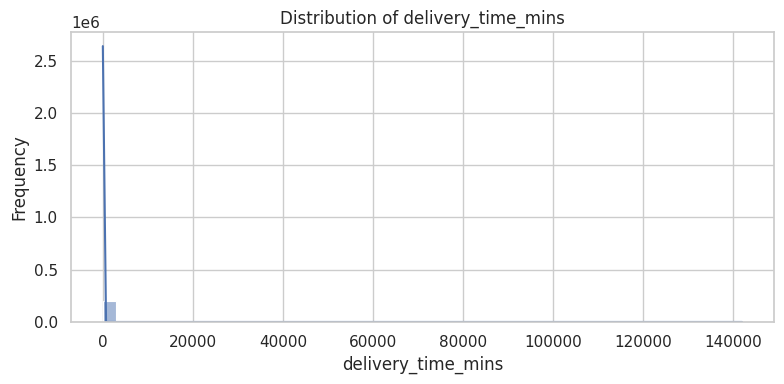

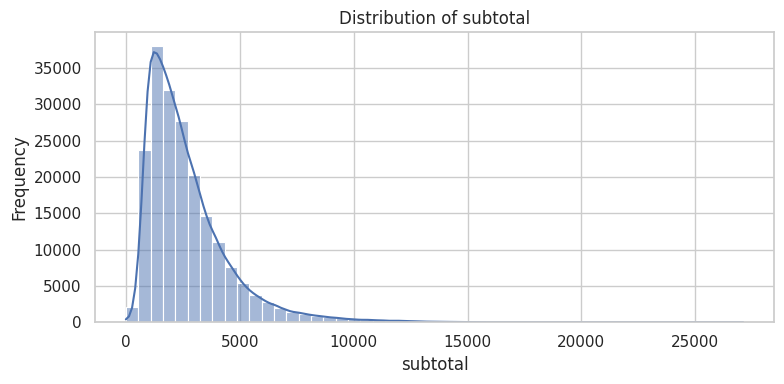

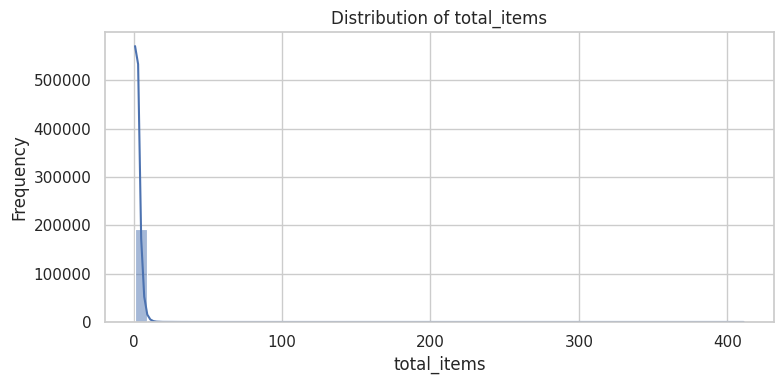

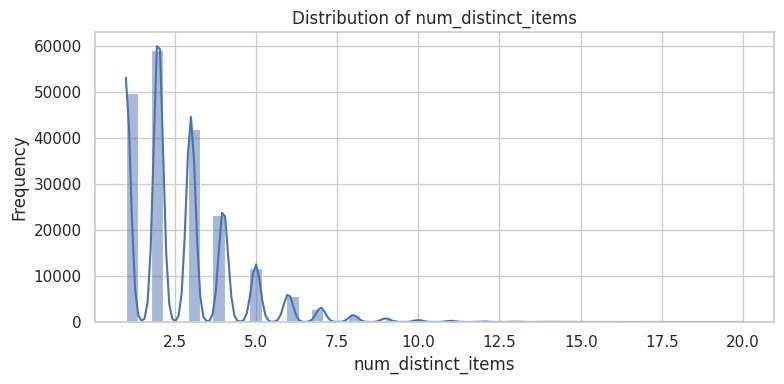

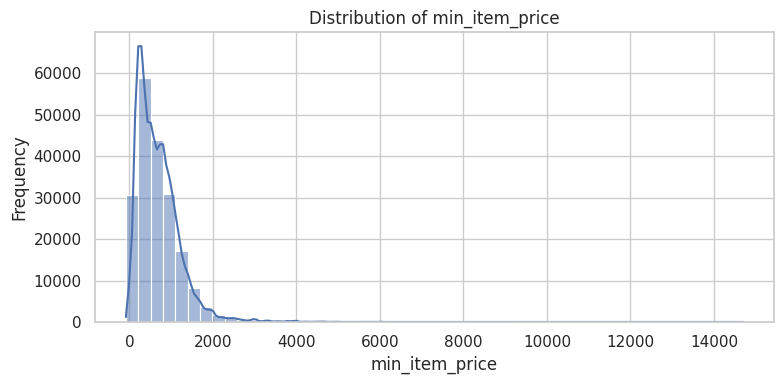

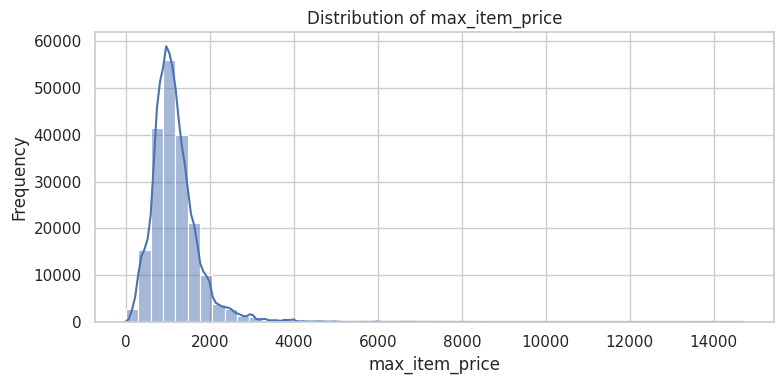

In [8]:
# Plot distributions of numeric features
numeric_features = ['delivery_time_mins', 'subtotal', 'total_items',
                    'num_distinct_items', 'min_item_price', 'max_item_price']

# Create individual plots
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

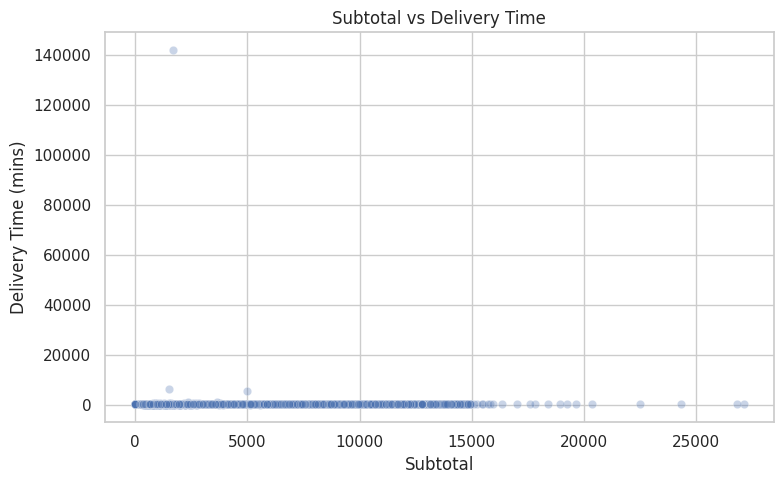

In [9]:
# Scatterplot: subtotal vs delivery time
plt.figure(figsize=(8, 5))
sns.scatterplot(x='subtotal', y='delivery_time_mins', data=df, alpha=0.3)
plt.title('Subtotal vs Delivery Time')
plt.xlabel('Subtotal')
plt.ylabel('Delivery Time (mins)')
plt.tight_layout()
plt.show()

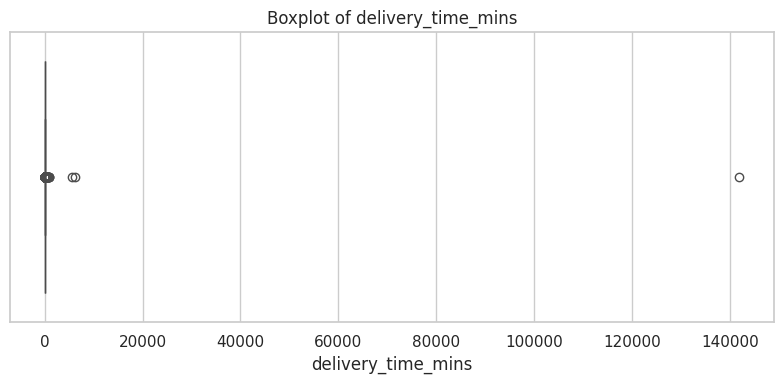

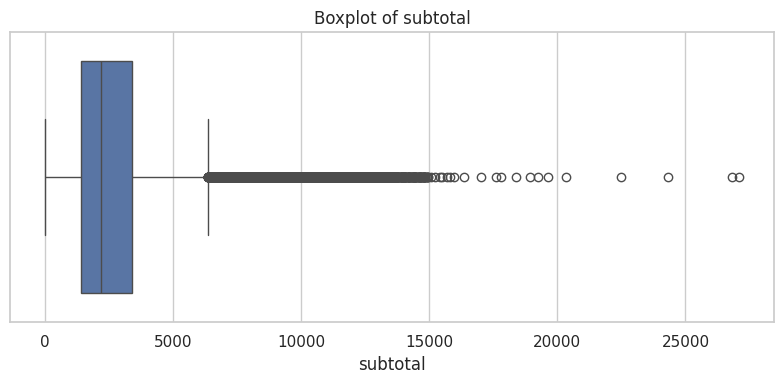

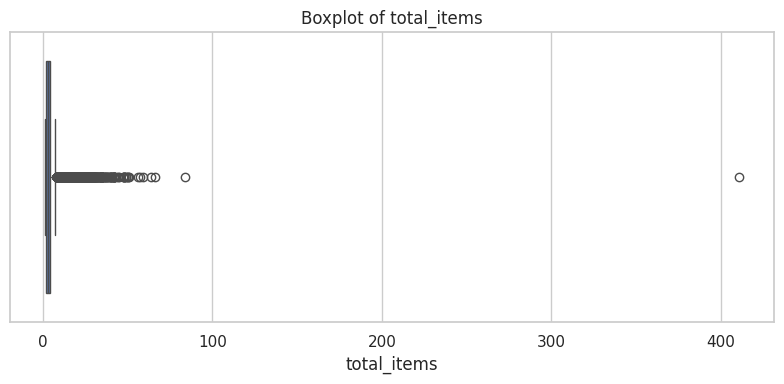

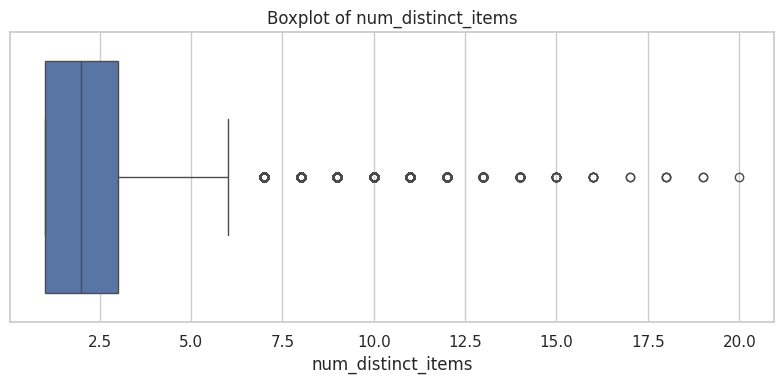

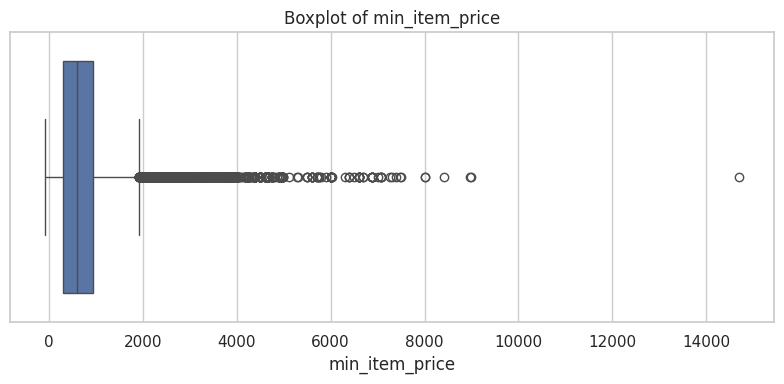

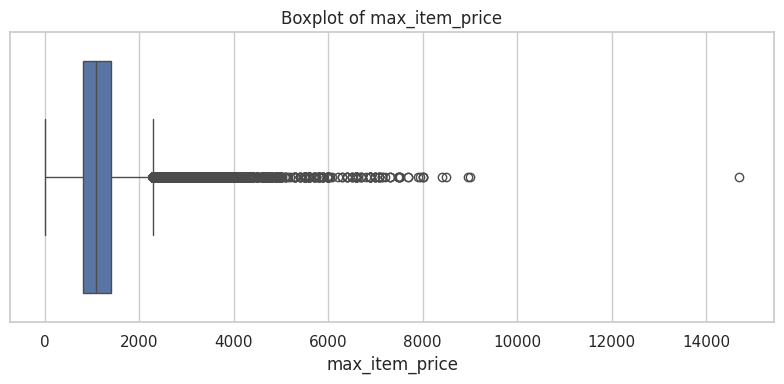

In [10]:
# Boxplots to check outliers
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

### Remove outliers

In [11]:
#remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [12]:
cols_with_outliers = ['delivery_time_mins', 'subtotal', 'total_items',
                      'num_distinct_items', 'min_item_price', 'max_item_price']

for col in cols_with_outliers:
    df = remove_outliers_iqr(df, col)

df.shape

(168609, 17)

### Building Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [14]:
X = df.drop(columns=['delivery_time_mins', 'created_at', 'actual_delivery_time', 'store_id'])
y = df['delivery_time_mins']

#categorical and numerical columns
categorical_cols = ['store_primary_category', 'order_protocol', 'market_id']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

#preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [15]:
# create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# fir the model
history = model.fit(X_train_processed, y_train, validation_split=0.2, epochs=20, batch_size=256)

# evaluate the model
y_pred = model.predict(X_test_processed).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1110.6110 - mae: 27.2431 - val_loss: 184.1145 - val_mae: 10.7933
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 179.4384 - mae: 10.6367 - val_loss: 173.7479 - val_mae: 10.4977
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 174.2495 - mae: 10.4772 - val_loss: 171.4854 - val_mae: 10.4221
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 171.3512 - mae: 10.3900 - val_loss: 171.1252 - val_mae: 10.3653
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 169.6331 - mae: 10.3328 - val_loss: 168.5453 - val_mae: 10.2806
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 169.3081 - mae: 10.3110 - val_loss: 167.3472 - val_mae: 10.2115
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167.2315 - mae: 10.2254 - val_loss: 166.3859 - val_mae: 10.2293
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 166.0474 - mae: 10.2086 - val_loss: 166.0087 - val_mae: 10.1977
Epoch 9

In [16]:
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

MSE: 163.70, RMSE: 12.79, MAE: 10.12


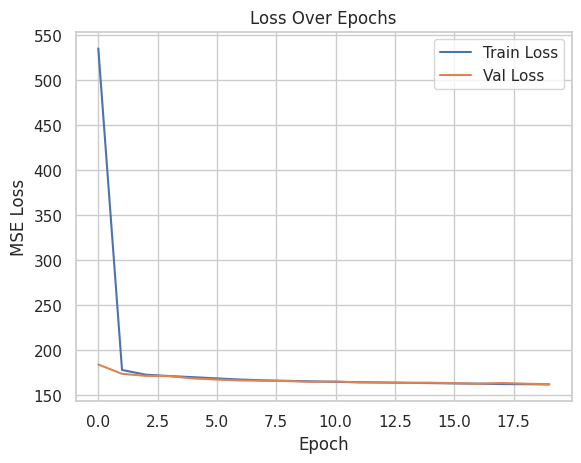

In [17]:
#plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()